
# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 

In [45]:
import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [12]:
df=pd.read_csv('data/adult.csv')


In [18]:
print(df.shape)
print("Row",df.shape[0])
print("col ",df.shape[1])

(48842, 15)
Row 48842
col  15


In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [41]:
print(df.shape)

print(df.info())

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [24]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [43]:
missing_val=['n/a','-','?']

df=pd.read_csv('data/adult.csv',na_values=missing_val)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [45]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [48]:
df[df.isnull().sum(axis=1)>=1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


# Remove Col 'fnlwgt' from database

In [25]:
df=df.drop('fnlwgt',axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [27]:
s=len(df.index)
s

48842

In [28]:
df=df.dropna(axis=0,how='any')

In [29]:
row_perct=len(df)/s*100
row_perct

100.0

# missing value pattern

D:\anaconda\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
D:\anaconda\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 432x288 with 0 Axes>

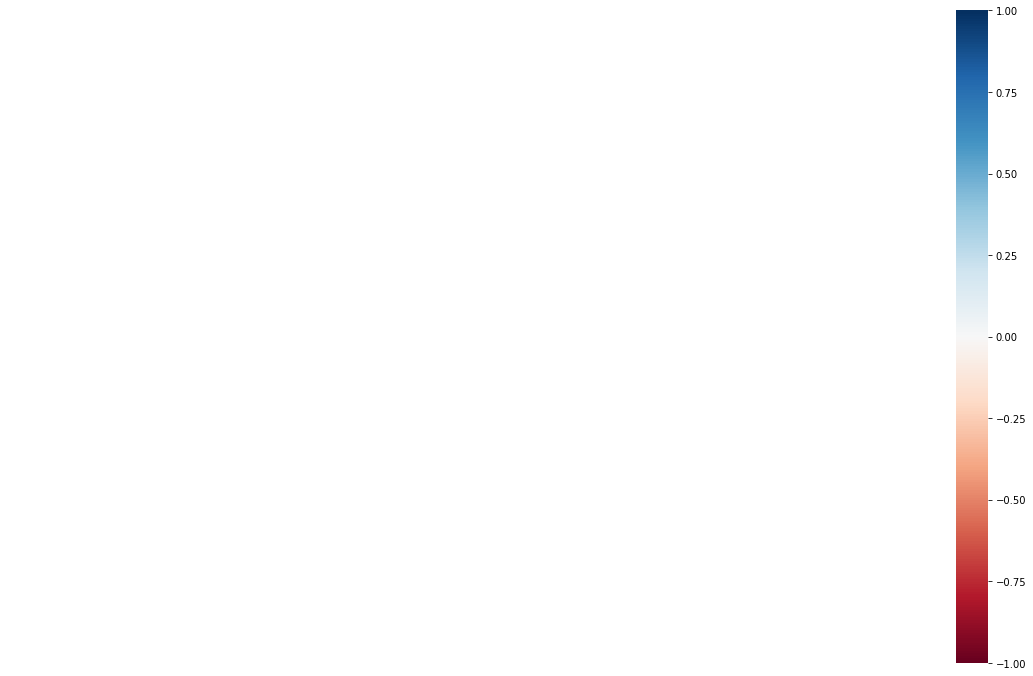

<Figure size 432x288 with 0 Axes>

In [46]:
mn.heatmap(df)
plt.figure()

# Bar chart

<Figure size 432x288 with 0 Axes>

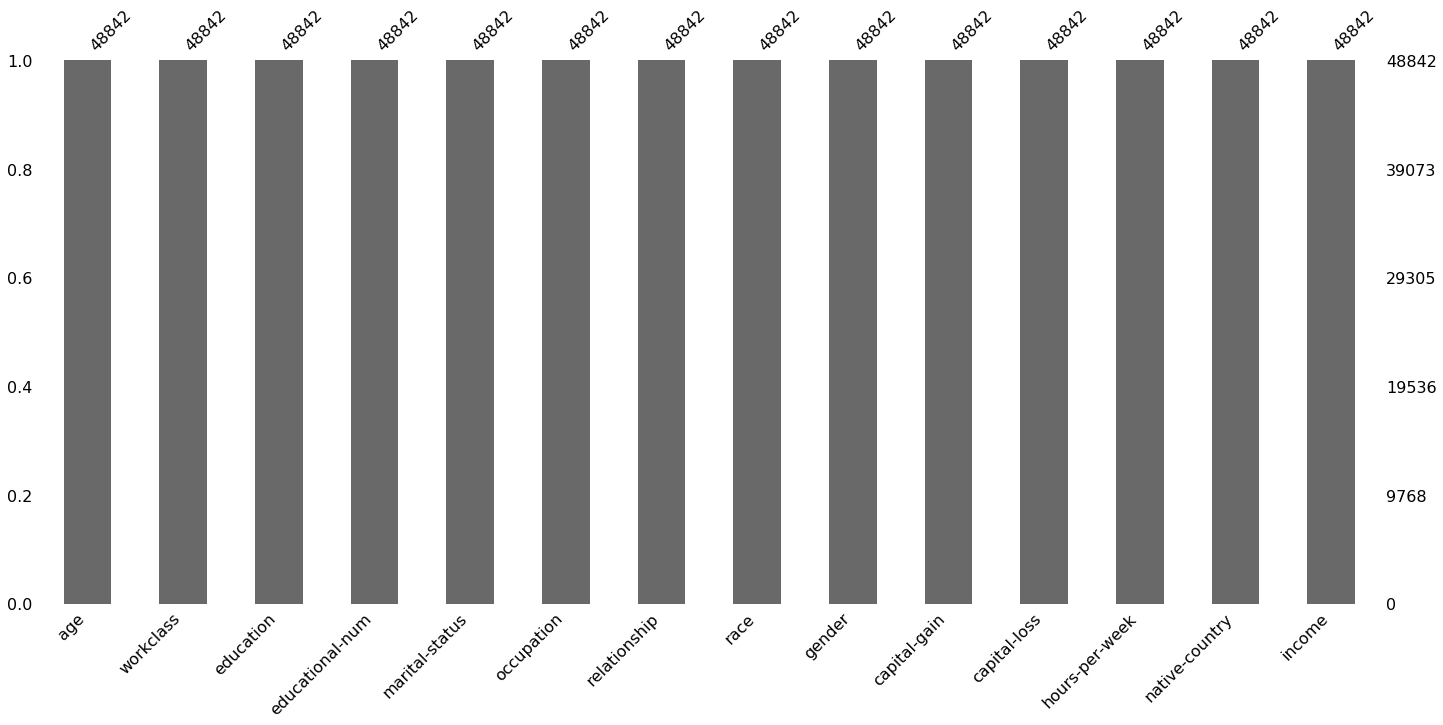

<Figure size 432x288 with 0 Axes>

In [47]:
mn.bar(df)
plt.figure()

# Univariate Analysis

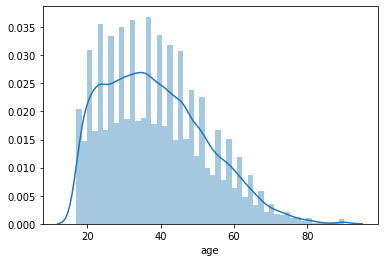

In [31]:
sns.distplot(df['age'])

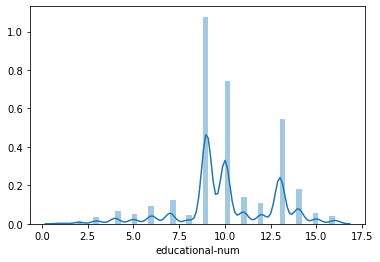

In [32]:
sns.distplot(df['educational-num'])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

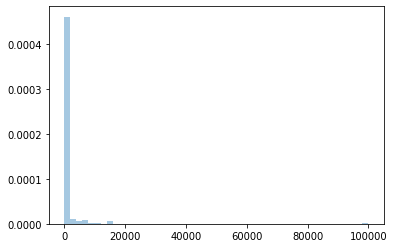

In [48]:
sns.distplot(df['capital-gain'])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

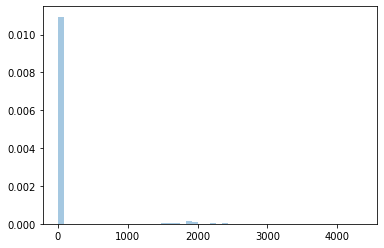

In [34]:
sns.distplot(df['capital-loss'])

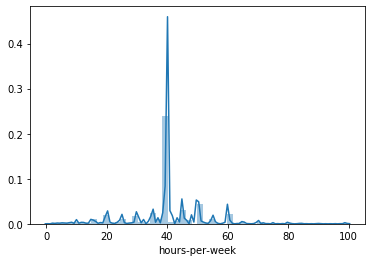

In [35]:
sns.distplot(df['hours-per-week'])

# Histogram 

<function matplotlib.pyplot.show(*args, **kw)>

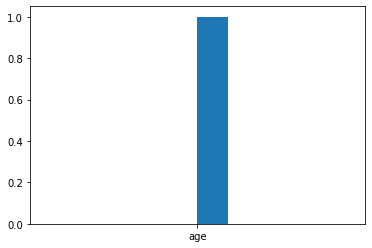

In [49]:
plt.hist(['age'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

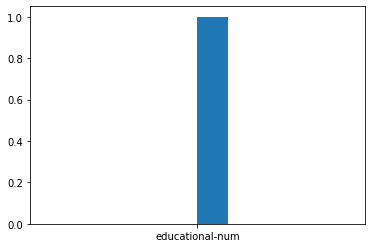

In [38]:
plt.hist(['educational-num'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

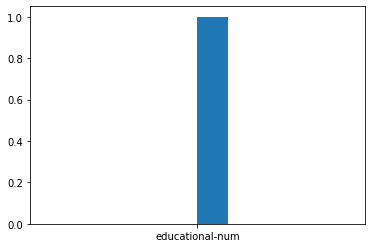

In [50]:
plt.hist(['educational-num'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

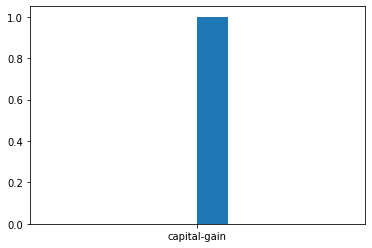

In [51]:
plt.hist(['capital-gain'])
plt.show

# boxplot

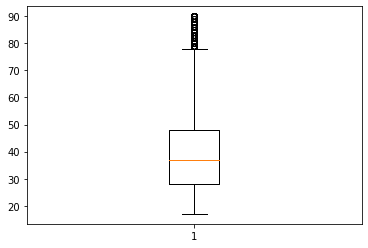

In [52]:
plt.boxplot(df['age'])
plt.show()

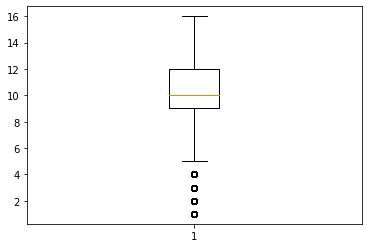

In [53]:
plt.boxplot(df['educational-num'])
plt.show()

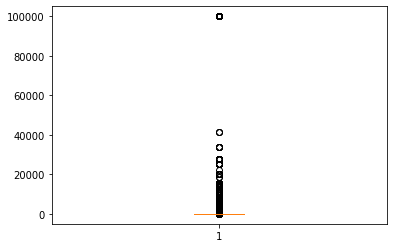

In [54]:
plt.boxplot(df['capital-gain'])
plt.show()

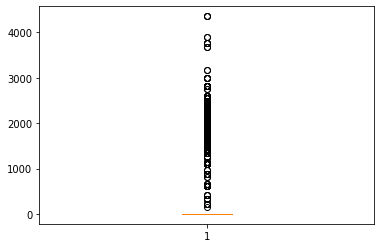

In [55]:
plt.boxplot(df['capital-loss'])
plt.show()

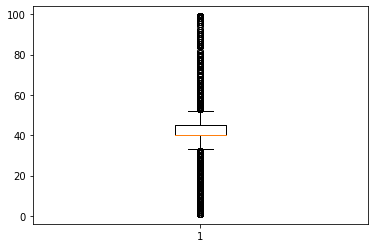

In [56]:
plt.boxplot(df['hours-per-week'])
plt.show()

# Countplot

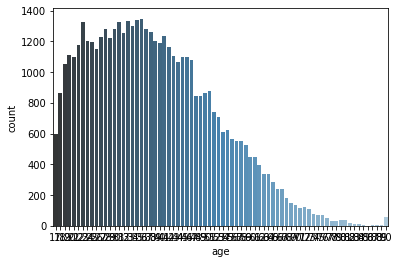

In [58]:
sns.countplot(x='age',data=df,palette='Blues_d')

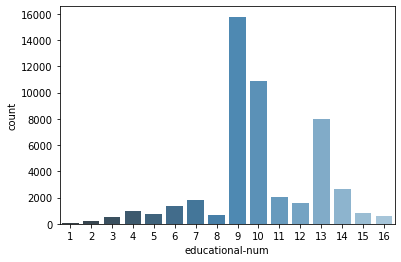

In [59]:
sns.countplot(x='educational-num',data=df,palette='Blues_d')

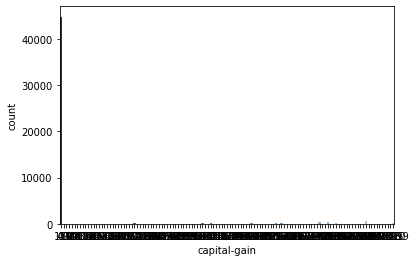

In [60]:
sns.countplot(x='capital-gain',data=df,palette='Blues_d')

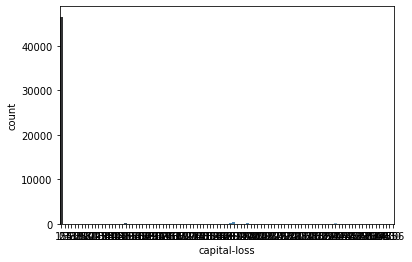

In [61]:
sns.countplot(x='capital-loss',data=df,palette='Blues_d')

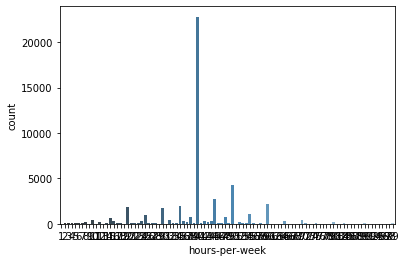

In [62]:
sns.countplot(x='hours-per-week',data=df,palette='Blues_d')

# Bivariate Analysis


# relation between numerical col using scatter plot

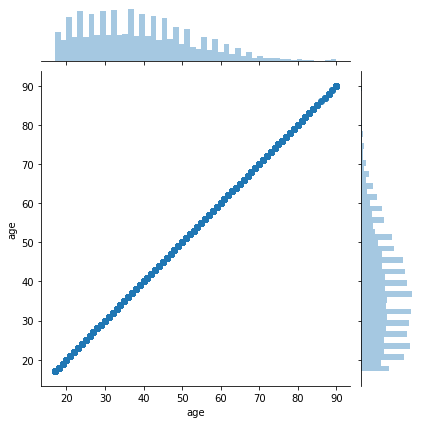

In [65]:
sns.jointplot(x='age',y='age',data=df,kind='scatter')

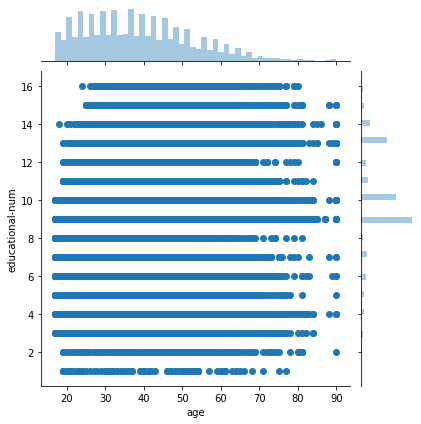

In [66]:
sns.jointplot(x='age',y='educational-num',data=df,kind='scatter')

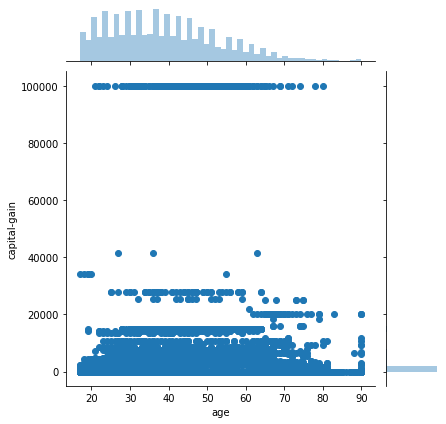

In [67]:
sns.jointplot(x='age',y='capital-gain',data=df,kind='scatter')

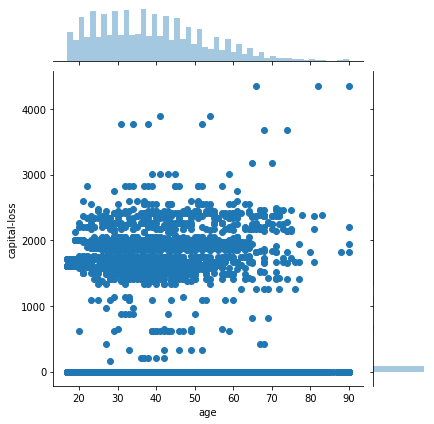

In [68]:
sns.jointplot(x='age',y='capital-loss',data=df,kind='scatter')

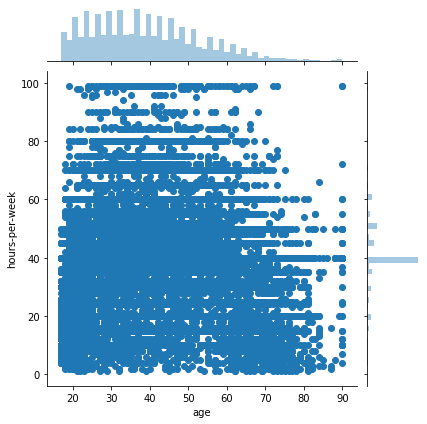

In [69]:
sns.jointplot(x='age',y='hours-per-week',data=df,kind='scatter')

# ecucational-num

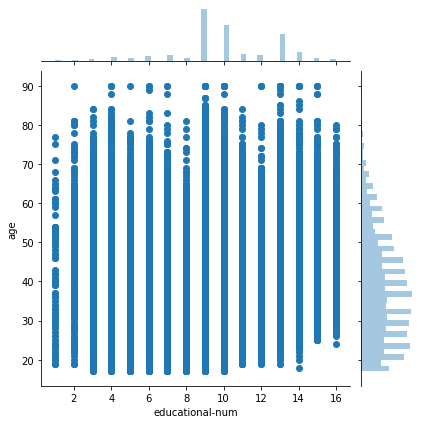

In [70]:
sns.jointplot(x='educational-num',y='age',data=df,kind='scatter')

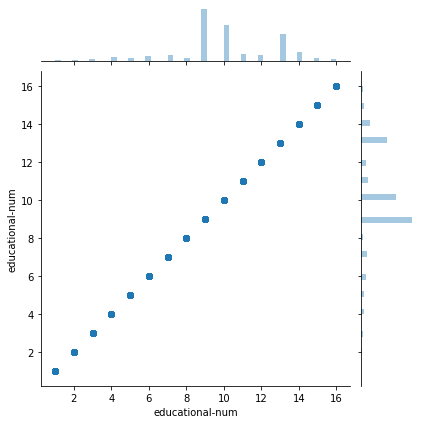

In [71]:
sns.jointplot(x='educational-num',y='educational-num',data=df,kind='scatter')

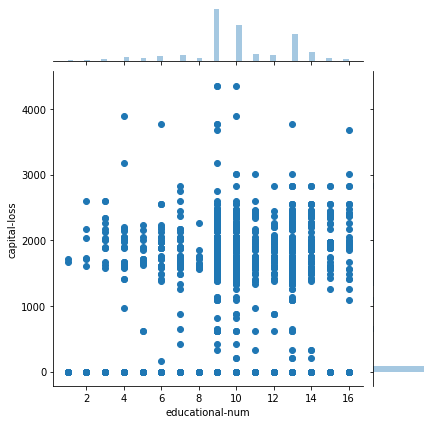

In [72]:
sns.jointplot(x='educational-num',y='capital-loss',data=df,kind='scatter')

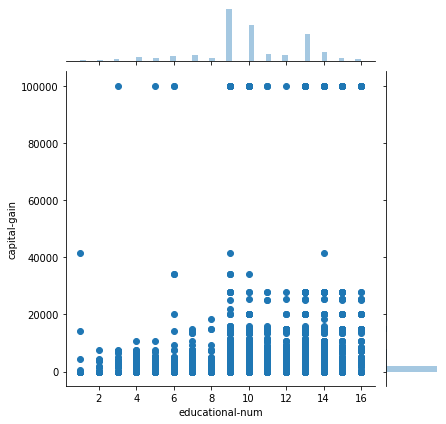

In [73]:
sns.jointplot(x='educational-num',y='capital-gain',data=df,kind='scatter')

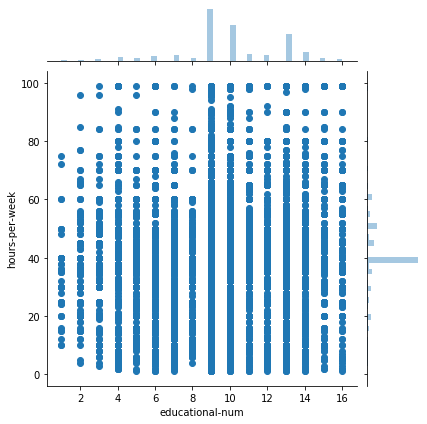

In [74]:
sns.jointplot(x='educational-num',y='hours-per-week',data=df,kind='scatter')

# capital-gain col

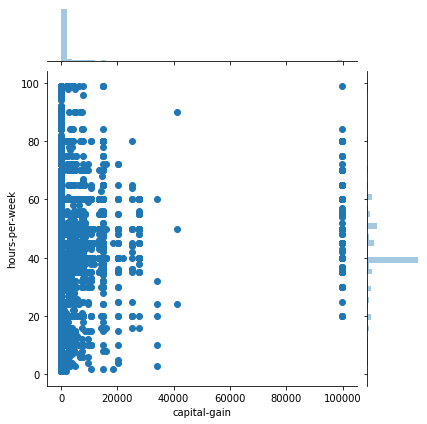

In [76]:
sns.jointplot(x='capital-gain',y='hours-per-week',data=df,kind='scatter')

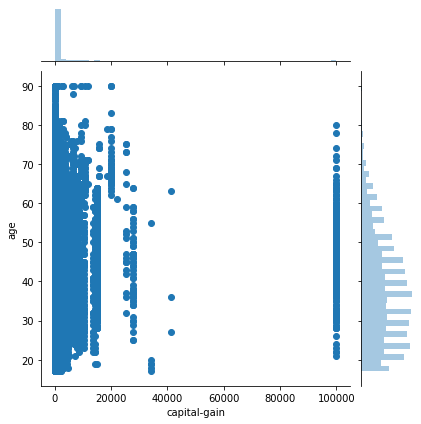

In [77]:
sns.jointplot(x='capital-gain',y='age',data=df,kind='scatter')

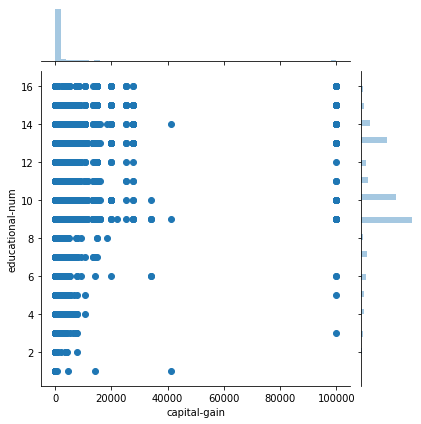

In [78]:
sns.jointplot(x='capital-gain',y='educational-num',data=df,kind='scatter')

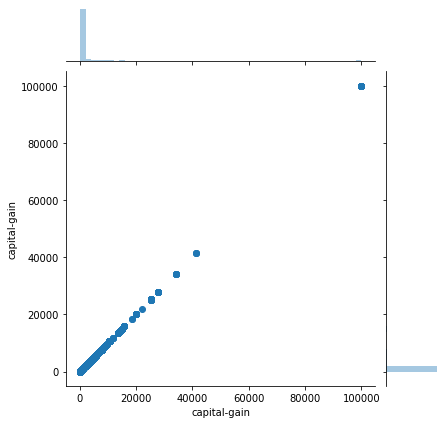

In [79]:
sns.jointplot(x='capital-gain',y='capital-gain',data=df,kind='scatter')

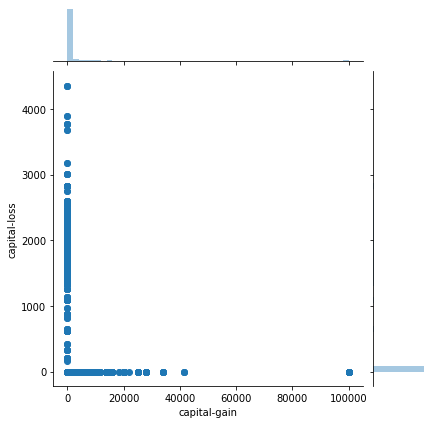

In [80]:
sns.jointplot(x='capital-gain',y='capital-loss',data=df,kind='scatter')

# capital-loss

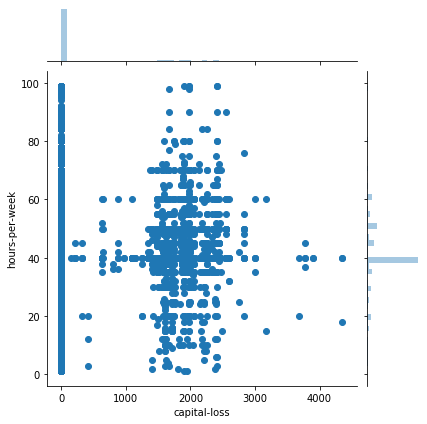

In [81]:
sns.jointplot(x='capital-loss',y='hours-per-week',data=df,kind='scatter')

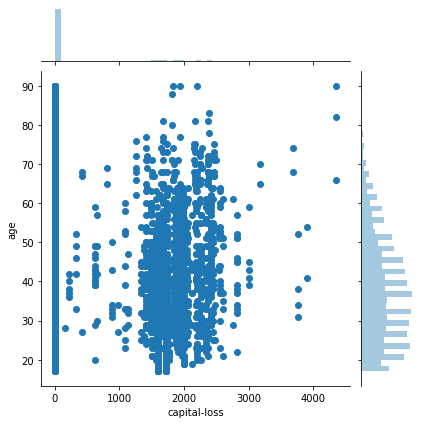

In [82]:
sns.jointplot(x='capital-loss',y='age',data=df,kind='scatter')

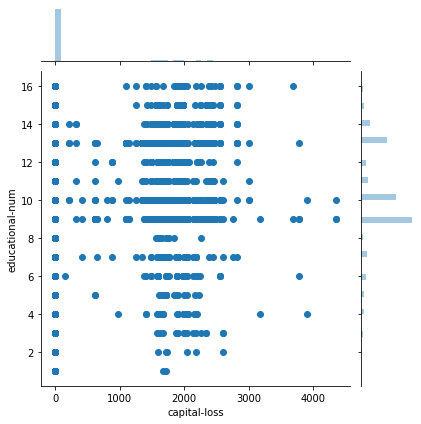

In [83]:
sns.jointplot(x='capital-loss',y='educational-num',data=df,kind='scatter')

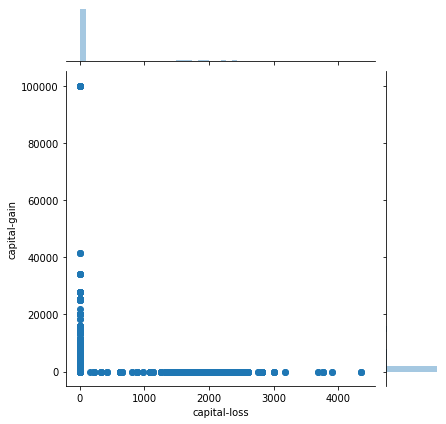

In [84]:
sns.jointplot(x='capital-loss',y='capital-gain',data=df,kind='scatter')

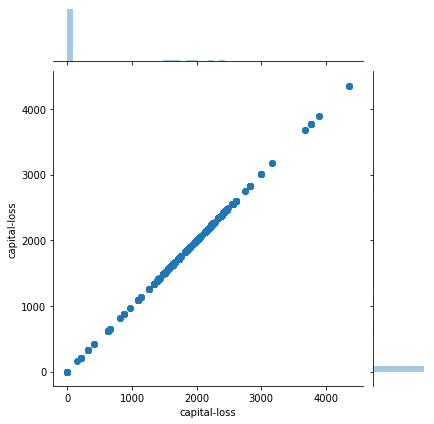

In [85]:
sns.jointplot(x='capital-loss',y='capital-loss',data=df,kind='scatter')

# hours-per-week

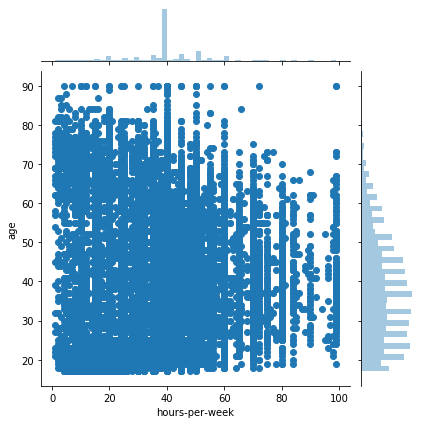

In [86]:
sns.jointplot(x='hours-per-week',y='age',data=df,kind='scatter')

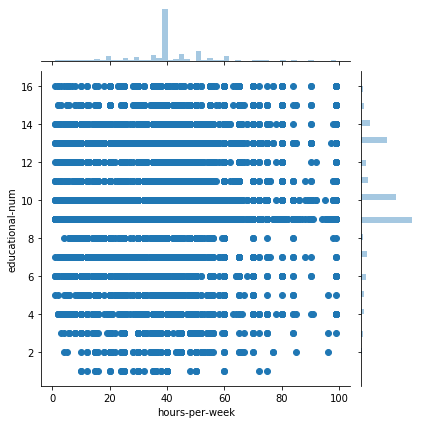

In [87]:
sns.jointplot(x='hours-per-week',y='educational-num',data=df,kind='scatter')

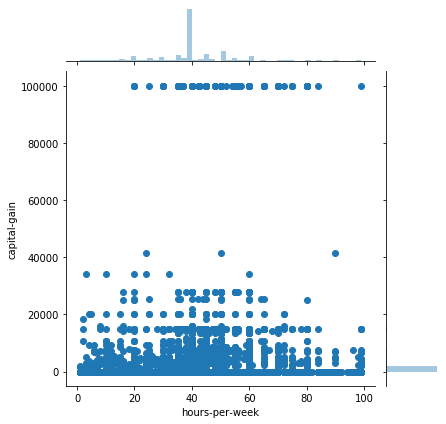

In [89]:
sns.jointplot(x='hours-per-week',y='capital-gain',data=df,kind='scatter')

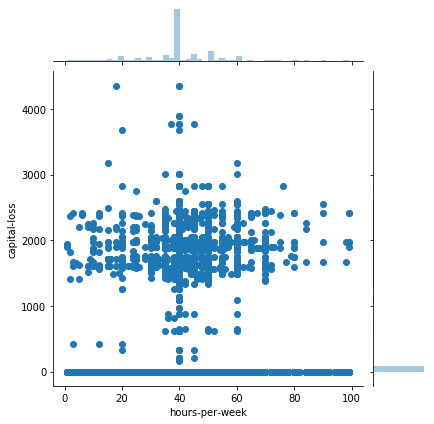

In [90]:
sns.jointplot(x='hours-per-week',y='capital-loss',data=df,kind='scatter')

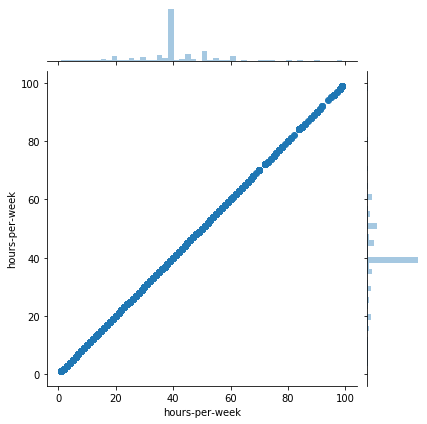

In [91]:
sns.jointplot(x='hours-per-week',y='hours-per-week',data=df,kind='scatter')

# HexBin Plot

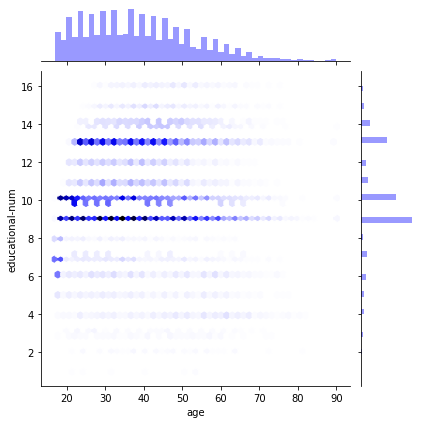

In [92]:
sns.jointplot(x='age',y='educational-num',data=df,kind='hex',color='b')

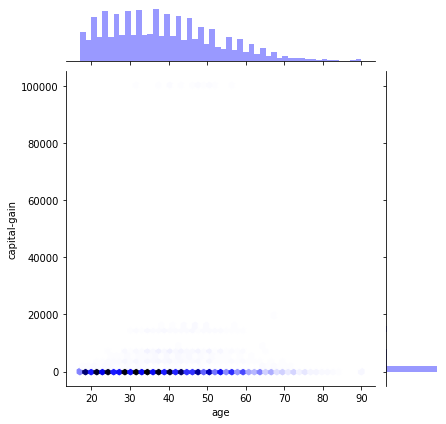

In [93]:
sns.jointplot(x='age',y='capital-gain',data=df,kind='hex',color='b')

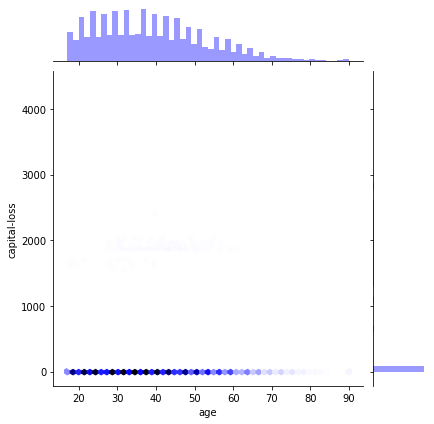

In [94]:
sns.jointplot(x='age',y='capital-loss',data=df,kind='hex',color='b')

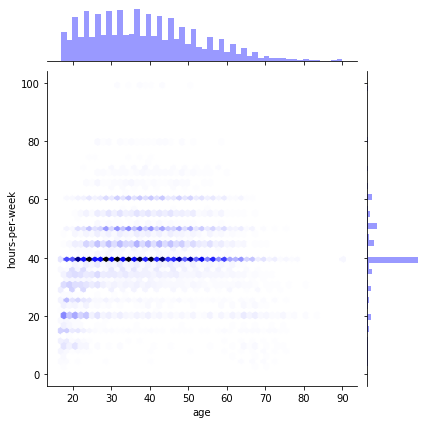

In [95]:
sns.jointplot(x='age',y='hours-per-week',data=df,kind='hex',color='b')

# educational-num

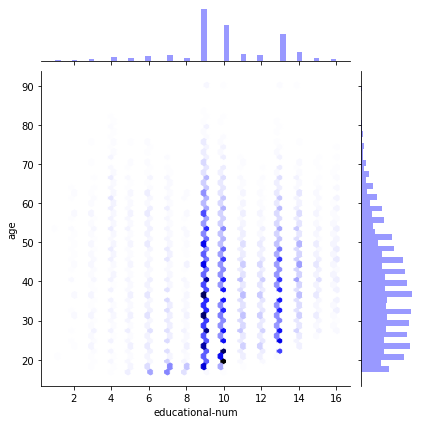

In [96]:
sns.jointplot(x='educational-num',y='age',data=df,kind='hex',color='b')

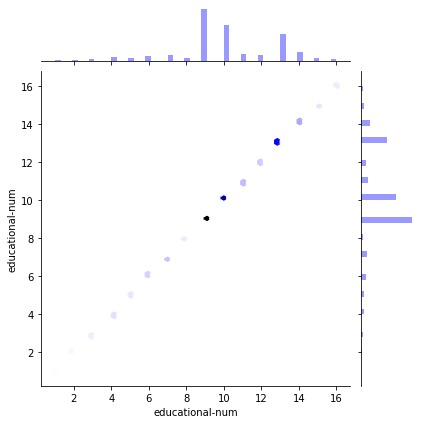

In [97]:
sns.jointplot(x='educational-num',y='educational-num',data=df,kind='hex',color='b')

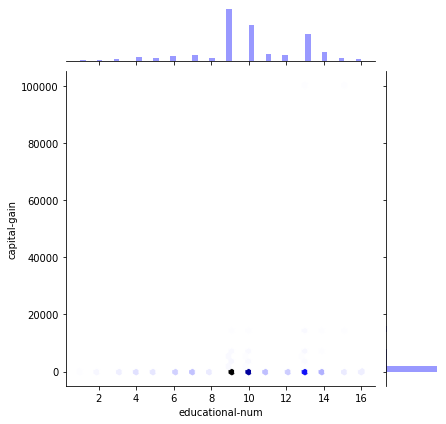

In [98]:
sns.jointplot(x='educational-num',y='capital-gain',data=df,kind='hex',color='b')

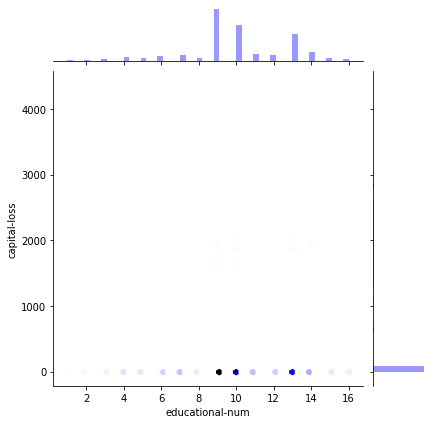

In [99]:
sns.jointplot(x='educational-num',y='capital-loss',data=df,kind='hex',color='b')

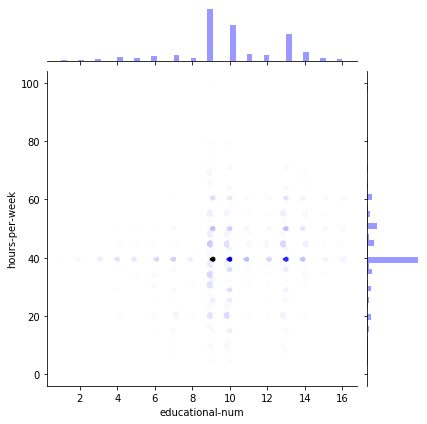

In [100]:
sns.jointplot(x='educational-num',y='hours-per-week',data=df,kind='hex',color='b')

# capital-gain

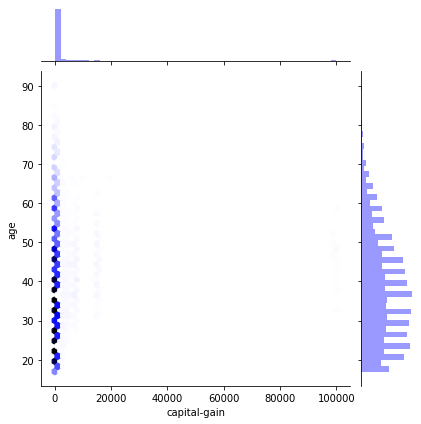

In [101]:
sns.jointplot(x='capital-gain',y='age',data=df,kind='hex',color='b')

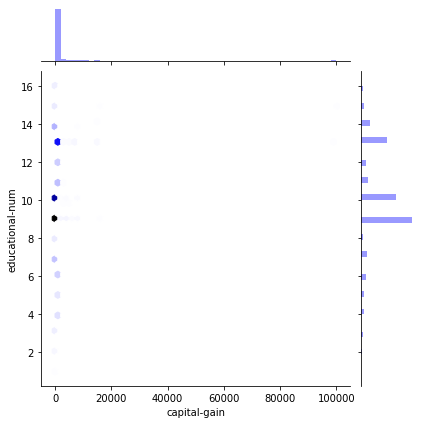

In [102]:
sns.jointplot(x='capital-gain',y='educational-num',data=df,kind='hex',color='b')

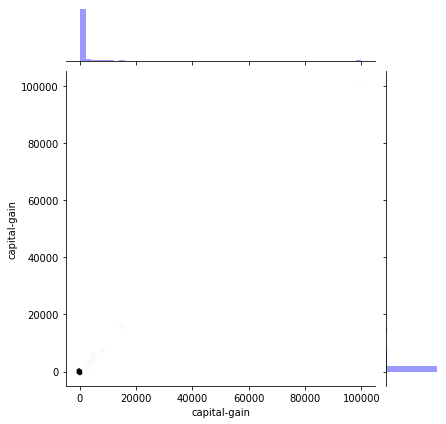

In [103]:
sns.jointplot(x='capital-gain',y='capital-gain',data=df,kind='hex',color='b')

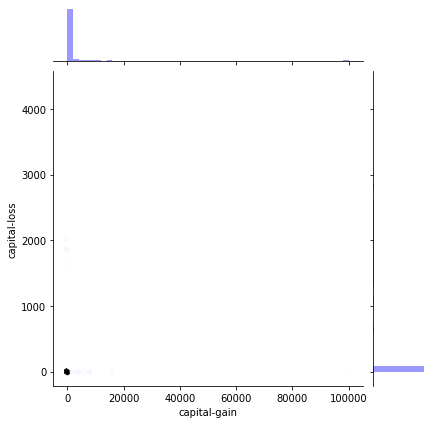

In [104]:
sns.jointplot(x='capital-gain',y='capital-loss',data=df,kind='hex',color='b')

# capital-loss

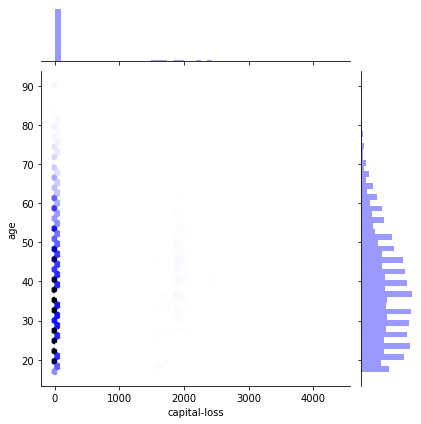

In [107]:
sns.jointplot(x='capital-loss',y='age',data=df,kind='hex',color='b')

sns.jointplot(x='capital-gain',y='hours-per-week',data=df,kind='hex',color='b')

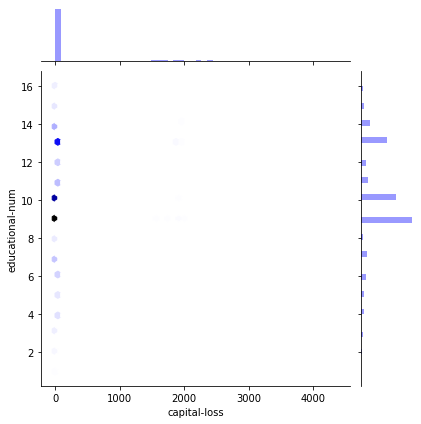

In [108]:
sns.jointplot(x='capital-loss',y='educational-num',data=df,kind='hex',color='b')

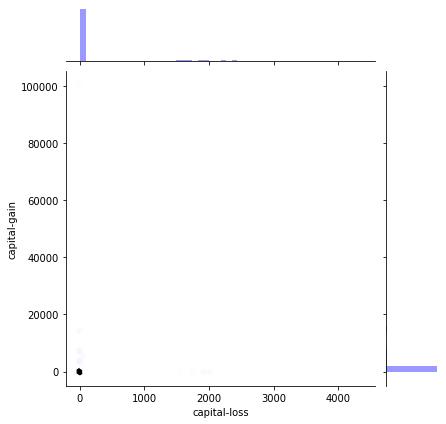

In [109]:
sns.jointplot(x='capital-loss',y='capital-gain',data=df,kind='hex',color='b')

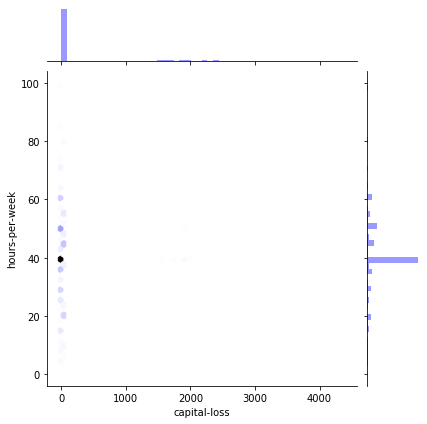

In [113]:
sns.jointplot(x='capital-loss',y='hours-per-week',data=df,kind='hex',color='b')

# hours-per-week

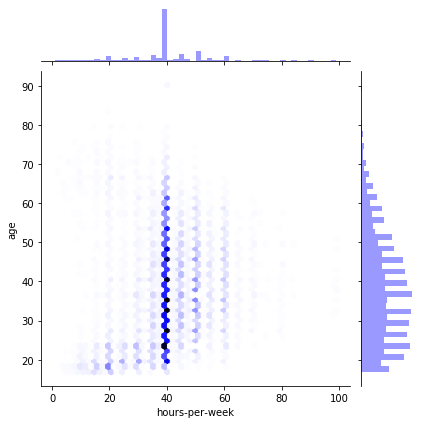

In [114]:
sns.jointplot(x='hours-per-week',y='age',data=df,kind='hex',color='b')

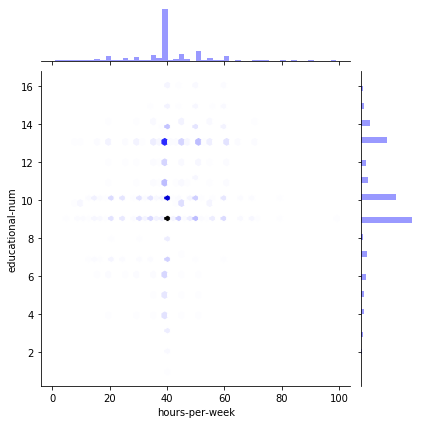

In [116]:
sns.jointplot(x='hours-per-week',y='educational-num',data=df,kind='hex',color='b')

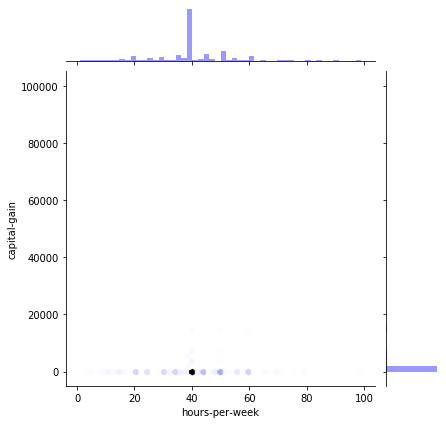

In [117]:
sns.jointplot(x='hours-per-week',y='capital-gain',data=df,kind='hex',color='b')

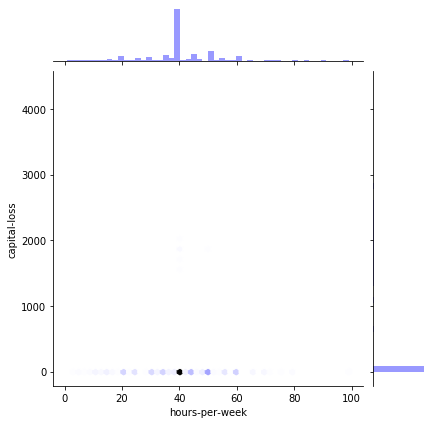

In [118]:
sns.jointplot(x='hours-per-week',y='capital-loss',data=df,kind='hex',color='b')

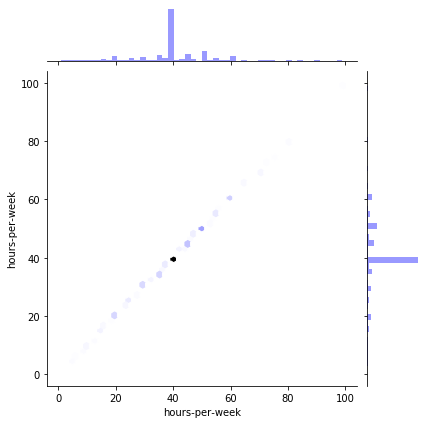

In [119]:
sns.jointplot(x='hours-per-week',y='hours-per-week',data=df,kind='hex',color='b')

# pair plots

In [120]:
df=df.drop('fnlwgt',axis=1)
sns.pairplot(df)

KeyError: "['fnlwgt'] not found in axis"